In [1]:

# here ,using lung_dfs_cis as input , can use any other file in its place like lung_dfs_car or brca_dfs_pac


import warnings
warnings.filterwarnings("ignore")
#ignore warnings
import pandas as pd

lung_dfs_cis=pd.read_csv('/Users/priyamvadakumar/Desktop/research/data/lung_dfs_cis.csv')

print(lung_dfs_cis)





    status     months  lg_clone_snv  lg_clone_cnv  branch_mean  branch_max  \
0        0  18.562994      0.955105      0.735709     0.972369    0.974097   
1        1  12.977669      0.710492      0.586714     0.703805    0.704855   
2        1  26.119611      0.599377      0.598280     0.617707    0.613024   
3        1   6.406697      0.648159      0.505391     0.631109    0.624544   
4        0   7.359488      0.719031      0.691232     0.750760    0.748603   
5        1  11.203506      0.201091      0.334206     0.185599    0.176366   
6        1  17.610203      0.243362      0.405381     0.265587    0.255929   
7        1   6.012439      0.395449      0.191770     0.325852    0.318929   
8        1   6.012439      0.395449      0.191770     0.325852    0.318929   
9        1  27.893774      0.425459      0.458397     0.425125    0.412624   
10       1   6.538117      0.354086      0.515658     0.408655    0.402297   
11       0  31.179259      0.710739      0.514542     0.686294  

In [2]:
#checking numerical and categorical variables

num_vars= lung_dfs_cis.columns[lung_dfs_cis.dtypes != 'object']
cat_vars= lung_dfs_cis.columns[lung_dfs_cis.dtypes == 'object']

print(num_vars)
print(cat_vars)

Index(['status', 'months', 'lg_clone_snv', 'lg_clone_cnv', 'branch_mean',
       'branch_max', 'branch_var', 'height', 'cnv_rate', 'snv_rate',
       ...
       'race', 'pathologic_stage|stage ia', 'pathologic_stage|stage ib',
       'pathologic_stage|stage iia', 'pathologic_stage|stage iib',
       'pathologic_stage|stage iiia', 'anatomic_neoplasm_subdivision|l-upper',
       'anatomic_neoplasm_subdivision|r-upper',
       'anatomic_neoplasm_subdivision|l-lower',
       'anatomic_neoplasm_subdivision|r-lower'],
      dtype='object', length=131)
Index(['measure_of_response'], dtype='object')


In [3]:
# checking all columns : features !
for cols in lung_dfs_cis.columns:
    print(cols)

status
months
lg_clone_snv
lg_clone_cnv
branch_mean
branch_max
branch_var
height
cnv_rate
snv_rate
cnv_lg_rate
cnv_sm_rate
T->A
T->C
T->G
C->A
C->T
C->G
ATA->AAA
ATT->AAT
ATC->AAC
ATG->AAG
TTA->TAA
TTT->TAT
TTC->TAC
TTG->TAG
CTA->CAA
CTT->CAT
CTC->CAC
CTG->CAG
GTA->GAA
GTT->GAT
GTC->GAC
GTG->GAG
ATA->ACA
ATT->ACT
ATC->ACC
ATG->ACG
TTA->TCA
TTT->TCT
TTC->TCC
TTG->TCG
CTA->CCA
CTT->CCT
CTC->CCC
CTG->CCG
GTA->GCA
GTT->GCT
GTC->GCC
GTG->GCG
ATA->AGA
ATT->AGT
ATC->AGC
ATG->AGG
TTA->TGA
TTT->TGT
TTC->TGC
TTG->TGG
CTA->CGA
CTT->CGT
CTC->CGC
CTG->CGG
GTA->GGA
GTT->GGT
GTC->GGC
GTG->GGG
ACA->AAA
ACT->AAT
ACC->AAC
ACG->AAG
TCA->TAA
TCT->TAT
TCC->TAC
TCG->TAG
CCA->CAA
CCT->CAT
CCC->CAC
CCG->CAG
GCA->GAA
GCT->GAT
GCC->GAC
GCG->GAG
ACA->ATA
ACT->ATT
ACC->ATC
ACG->ATG
TCA->TTA
TCT->TTT
TCC->TTC
TCG->TTG
CCA->CTA
CCT->CTT
CCC->CTC
CCG->CTG
GCA->GTA
GCT->GTT
GCC->GTC
GCG->GTG
ACA->AGA
ACT->AGT
ACC->AGC
ACG->AGG
TCA->TGA
TCT->TGT
TCC->TGC
TCG->TGG
CCA->CGA
CCT->CGT
CCC->CGC
CCG->CGG
GCA->GGA
GCT->GGT
G

In [4]:
# checking total drug response types and their counts

responses=lung_dfs_cis['measure_of_response'].unique()
print(responses)
print(lung_dfs_cis['measure_of_response'].value_counts())

['Complete Response' 'Partial Response' 'Stable Disease'
 'Clinical Progressive Disease']
Complete Response               31
Clinical Progressive Disease     5
Stable Disease                   4
Partial Response                 1
Name: measure_of_response, dtype: int64


In [5]:
 
#merging stable, partial and clinical progressive response into incomplete response 
# so measure_of_response is binary 
check= lung_dfs_cis["measure_of_response"].replace(['Clinical Progressive Disease','Stable Disease','Partial Response'],'Incomplete Response')
print(check)




responses=check.unique()
print(responses)
print(check.value_counts())

0       Complete Response
1       Complete Response
2       Complete Response
3     Incomplete Response
4       Complete Response
5       Complete Response
6     Incomplete Response
7     Incomplete Response
8     Incomplete Response
9       Complete Response
10      Complete Response
11      Complete Response
12      Complete Response
13      Complete Response
14      Complete Response
15      Complete Response
16      Complete Response
17      Complete Response
18      Complete Response
19      Complete Response
20    Incomplete Response
21      Complete Response
22      Complete Response
23      Complete Response
24      Complete Response
25      Complete Response
26      Complete Response
27      Complete Response
28    Incomplete Response
29      Complete Response
30    Incomplete Response
31      Complete Response
32      Complete Response
33      Complete Response
34      Complete Response
35    Incomplete Response
36    Incomplete Response
37    Incomplete Response
38      Comp

In [6]:
# make new datset with dropped original measure_of_reponses col

lung_dfs_cis_datasets = lung_dfs_cis.drop(columns=['measure_of_response'])

In [7]:
# add new response columns to new dataset 


lung_dfs_cis_datasets['Response']=check


print(lung_dfs_cis_datasets)

respon=lung_dfs_cis_datasets['Response'].unique()
print(respon)
print(lung_dfs_cis_datasets['Response'].value_counts())



    status     months  lg_clone_snv  lg_clone_cnv  branch_mean  branch_max  \
0        0  18.562994      0.955105      0.735709     0.972369    0.974097   
1        1  12.977669      0.710492      0.586714     0.703805    0.704855   
2        1  26.119611      0.599377      0.598280     0.617707    0.613024   
3        1   6.406697      0.648159      0.505391     0.631109    0.624544   
4        0   7.359488      0.719031      0.691232     0.750760    0.748603   
5        1  11.203506      0.201091      0.334206     0.185599    0.176366   
6        1  17.610203      0.243362      0.405381     0.265587    0.255929   
7        1   6.012439      0.395449      0.191770     0.325852    0.318929   
8        1   6.012439      0.395449      0.191770     0.325852    0.318929   
9        1  27.893774      0.425459      0.458397     0.425125    0.412624   
10       1   6.538117      0.354086      0.515658     0.408655    0.402297   
11       0  31.179259      0.710739      0.514542     0.686294  

In [8]:
# encoding response variable 
import numpy as np
from sklearn.preprocessing import LabelEncoder
y=lung_dfs_cis_datasets['Response']
print(y)
y=LabelEncoder().fit_transform(y)
print(y)
print(np.unique(y))



0       Complete Response
1       Complete Response
2       Complete Response
3     Incomplete Response
4       Complete Response
5       Complete Response
6     Incomplete Response
7     Incomplete Response
8     Incomplete Response
9       Complete Response
10      Complete Response
11      Complete Response
12      Complete Response
13      Complete Response
14      Complete Response
15      Complete Response
16      Complete Response
17      Complete Response
18      Complete Response
19      Complete Response
20    Incomplete Response
21      Complete Response
22      Complete Response
23      Complete Response
24      Complete Response
25      Complete Response
26      Complete Response
27      Complete Response
28    Incomplete Response
29      Complete Response
30    Incomplete Response
31      Complete Response
32      Complete Response
33      Complete Response
34      Complete Response
35    Incomplete Response
36    Incomplete Response
37    Incomplete Response
38      Comp

In [9]:
#insert response column
lung_dfs_cis_datasets['Response']=y
print(lung_dfs_cis_datasets['Response'])

0     0
1     0
2     0
3     1
4     0
5     0
6     1
7     1
8     1
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    1
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    1
29    0
30    1
31    0
32    0
33    0
34    0
35    1
36    1
37    1
38    0
39    0
40    0
Name: Response, dtype: int64


In [10]:
print(lung_dfs_cis_datasets)

    status     months  lg_clone_snv  lg_clone_cnv  branch_mean  branch_max  \
0        0  18.562994      0.955105      0.735709     0.972369    0.974097   
1        1  12.977669      0.710492      0.586714     0.703805    0.704855   
2        1  26.119611      0.599377      0.598280     0.617707    0.613024   
3        1   6.406697      0.648159      0.505391     0.631109    0.624544   
4        0   7.359488      0.719031      0.691232     0.750760    0.748603   
5        1  11.203506      0.201091      0.334206     0.185599    0.176366   
6        1  17.610203      0.243362      0.405381     0.265587    0.255929   
7        1   6.012439      0.395449      0.191770     0.325852    0.318929   
8        1   6.012439      0.395449      0.191770     0.325852    0.318929   
9        1  27.893774      0.425459      0.458397     0.425125    0.412624   
10       1   6.538117      0.354086      0.515658     0.408655    0.402297   
11       0  31.179259      0.710739      0.514542     0.686294  

In [11]:
# word features is used for features in the dataframe format and X is used for features in numpy format
# only features
features=lung_dfs_cis_datasets.iloc[:, :-1]
print(features)
print(features.shape)

    status     months  lg_clone_snv  lg_clone_cnv  branch_mean  branch_max  \
0        0  18.562994      0.955105      0.735709     0.972369    0.974097   
1        1  12.977669      0.710492      0.586714     0.703805    0.704855   
2        1  26.119611      0.599377      0.598280     0.617707    0.613024   
3        1   6.406697      0.648159      0.505391     0.631109    0.624544   
4        0   7.359488      0.719031      0.691232     0.750760    0.748603   
5        1  11.203506      0.201091      0.334206     0.185599    0.176366   
6        1  17.610203      0.243362      0.405381     0.265587    0.255929   
7        1   6.012439      0.395449      0.191770     0.325852    0.318929   
8        1   6.012439      0.395449      0.191770     0.325852    0.318929   
9        1  27.893774      0.425459      0.458397     0.425125    0.412624   
10       1   6.538117      0.354086      0.515658     0.408655    0.402297   
11       0  31.179259      0.710739      0.514542     0.686294  

In [12]:
print(type(features))

<class 'pandas.core.frame.DataFrame'>


In [13]:
# convert features into numpy to enable use of sklearn
X=features.to_numpy()
print(type(X))
print(X)

<class 'numpy.ndarray'>
[[ 0.         18.56299426  0.95510541 ...  0.          1.
   0.        ]
 [ 1.         12.97766855  0.71049166 ...  1.          0.
   0.        ]
 [ 1.         26.11961139  0.5993773  ...  0.          1.
   0.        ]
 ...
 [ 0.         25.98819196  0.86525696 ...  0.          0.
   0.        ]
 [ 1.         10.31642513  0.23453446 ...  0.          0.
   1.        ]
 [ 0.         48.42805936  0.62795531 ...  1.          0.
   0.        ]]


In [14]:
print(X.shape)

(41, 131)


In [15]:
#train, test split with stratification

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(27, 131) (14, 131) (27,) (14,)


In [78]:
# #if want to apply standardization

# #standardisation of X_train and X_test, separately
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# features_train_transformed = pd.DataFrame(ss.fit_transform(X_train),columns = features.columns)
# features_test_transformed = pd.DataFrame(ss.fit_transform(X_test),columns = features.columns)

In [113]:
#  normalizing  X_train and X_test, separately 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_train_transformed = pd.DataFrame(scaler.fit_transform(X_train),columns = features.columns)
features_test_transformed = pd.DataFrame(scaler.fit_transform(X_test),columns = features.columns)

In [114]:
print(type(features_train_transformed))
print(features_train_transformed.shape)
print(features_train_transformed)


<class 'pandas.core.frame.DataFrame'>
(27, 131)
    status    months  lg_clone_snv  lg_clone_cnv  branch_mean  branch_max  \
0      0.0  0.631034      0.873922      0.917781     0.893715    0.891543   
1      1.0  0.660345      0.671681      0.829808     0.713581    0.708026   
2      0.0  0.876724      0.529166      0.579013     0.551695    0.549708   
3      1.0  0.143103      0.731919      0.659735     0.729145    0.721432   
4      1.0  0.681897      0.625747      0.890640     0.702965    0.704413   
5      0.0  0.668966      0.000000      0.000000     0.000000    0.000000   
6      0.0  1.000000      0.350647      0.310748     0.349693    0.335171   
7      1.0  0.437069      0.232058      0.476621     0.304662    0.292468   
8      1.0  0.146552      0.368785      0.678533     0.470808    0.462800   
9      0.0  0.552586      0.684917      0.817243     0.721567    0.714086   
10     1.0  0.132759      0.419862      0.085508     0.374648    0.365783   
11     1.0  0.262931      0.

In [115]:
print(type(features_test_transformed))
print(features_test_transformed.shape)
print(features_test_transformed)

<class 'pandas.core.frame.DataFrame'>
(14, 131)
    status    months  lg_clone_snv  lg_clone_cnv  branch_mean  branch_max  \
0      1.0  0.216981      0.660528      0.677916     0.659409    0.661940   
1      0.0  0.340348      1.000000      1.000000     1.000000    1.000000   
2      0.0  0.287373      0.260903      0.897571     0.475263    0.469521   
3      1.0  0.558055      0.555723      0.305862     0.528594    0.520136   
4      0.0  1.000000      0.545985      0.580800     0.554862    0.550498   
5      1.0  0.158200      0.000000      0.000000     0.000000    0.000000   
6      0.0  0.309144      0.650057      0.658661     0.661926    0.660216   
7      1.0  0.290276      0.436802      0.425161     0.441862    0.448539   
8      0.0  0.097242      0.358887      0.572223     0.417586    0.411153   
9      0.0  0.174891      0.113425      0.083763     0.119426    0.114255   
10     1.0  0.000000      0.860835      0.036803     0.799623    0.798807   
11     0.0  0.707547      0.

# Correlation Analysis

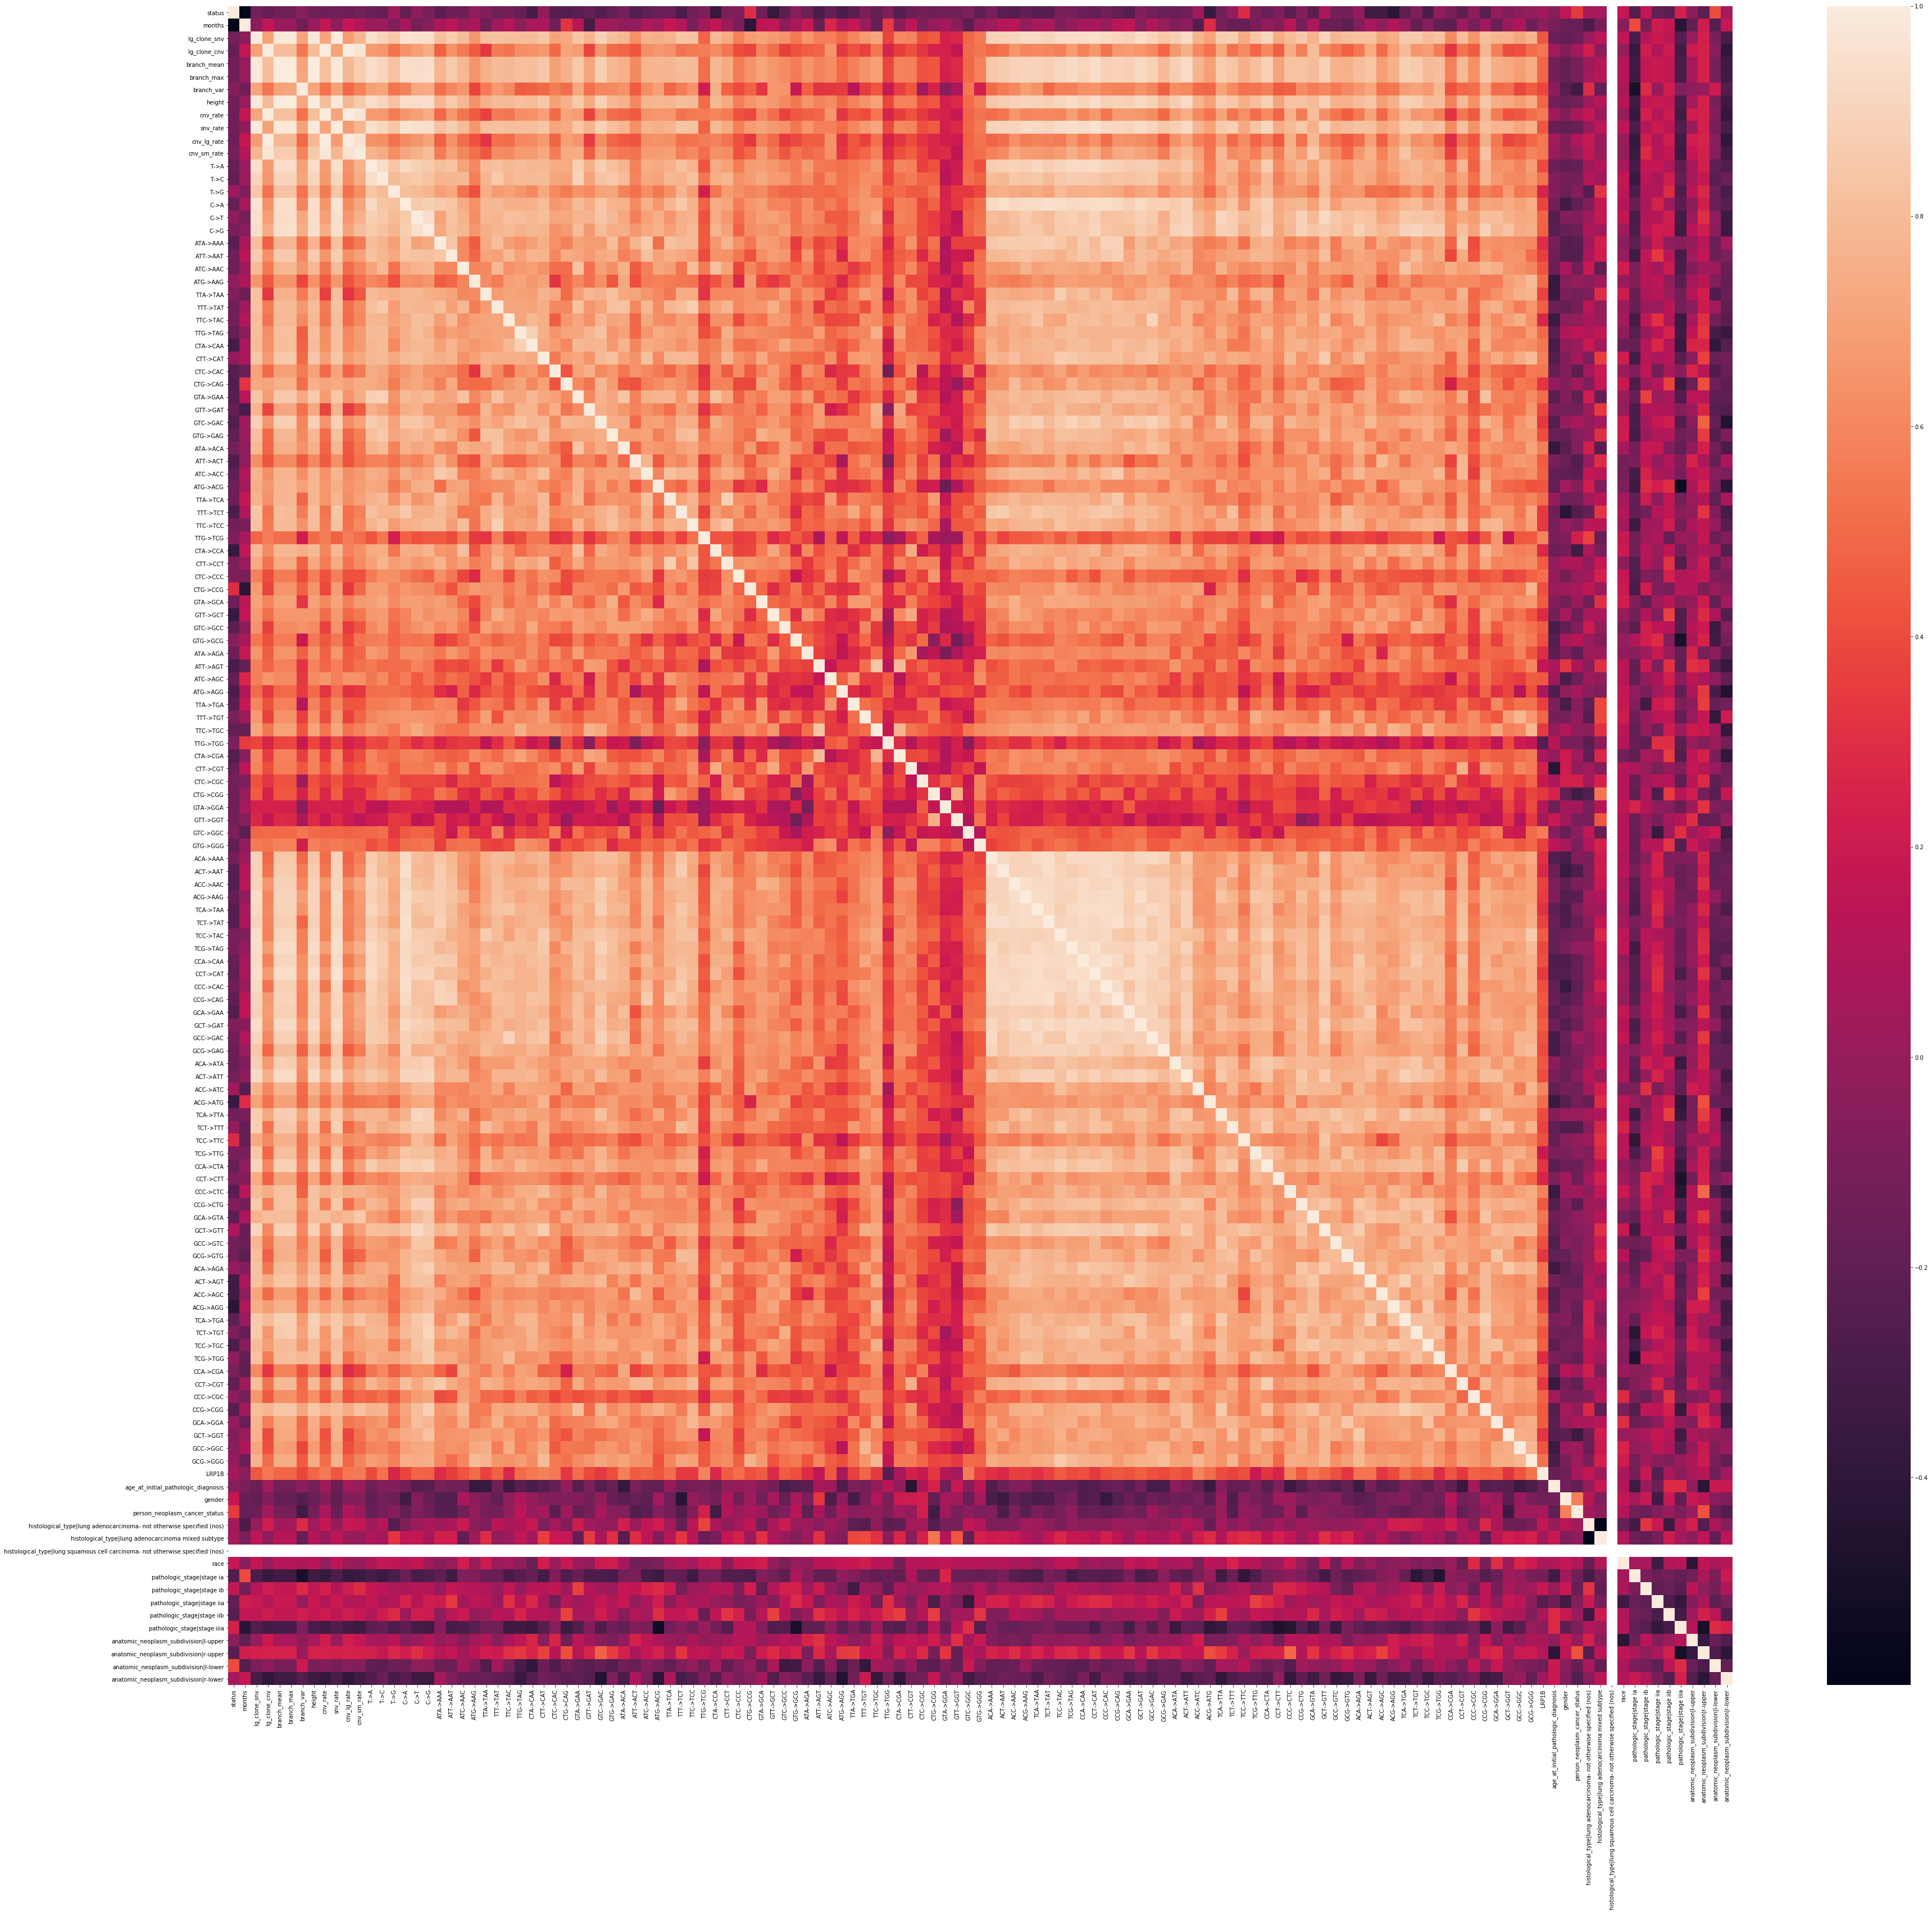

In [116]:
# correlation analysis - among features---using on X_train

import numpy as np
import matplotlib.pyplot as mp
import seaborn as sb


# plotting correlation heatmap
#dataplots=sb.heatmap(brca_dfs_cyclo.corr())

corr= features_train_transformed.corr()
#mp.subplots(figsize=(50,45))
mp.figure(figsize=(60,55))
sb.heatmap(corr)

    
# # displaying heatmap
mp.show()

In [117]:
print(corr.shape)
print(corr)

(131, 131)
                                         status    months  lg_clone_snv  \
status                                 1.000000 -0.590669     -0.123845   
months                                -0.590669  1.000000     -0.035500   
lg_clone_snv                          -0.123845 -0.035500      1.000000   
lg_clone_cnv                          -0.182375  0.161420      0.703778   
branch_mean                           -0.135364  0.016011      0.985191   
...                                         ...       ...           ...   
pathologic_stage|stage iiia            0.235780 -0.427687     -0.255374   
anatomic_neoplasm_subdivision|l-upper -0.042640 -0.194665      0.010120   
anatomic_neoplasm_subdivision|r-upper -0.222948  0.208278      0.238398   
anatomic_neoplasm_subdivision|l-lower  0.395285 -0.236851     -0.095806   
anatomic_neoplasm_subdivision|r-lower  0.059761  0.170099     -0.300533   

                                       lg_clone_cnv  branch_mean  branch_max  \
status  

# filtering out features with correlation of or above 90%


In [118]:
# word corr added in the variables to indicate the variables  after elimination on the basis of correlation
# filtering out one of the two features which have correlation of  90% and above
criteria = np.full((corr.shape[0],), True, dtype=bool)
print(criteria.shape)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if criteria[j]:
                criteria[j] = False
                
selected_columns_corr = features_train_transformed.columns[criteria]
print(selected_columns_corr)
print(selected_columns_corr.shape)


(131,)
Index(['status', 'months', 'lg_clone_snv', 'lg_clone_cnv', 'branch_var',
       'T->G', 'ATA->AAA', 'ATT->AAT', 'ATC->AAC', 'ATG->AAG', 'TTA->TAA',
       'TTT->TAT', 'TTC->TAC', 'TTG->TAG', 'CTA->CAA', 'CTT->CAT', 'CTC->CAC',
       'CTG->CAG', 'GTA->GAA', 'GTT->GAT', 'GTC->GAC', 'GTG->GAG', 'ATA->ACA',
       'ATT->ACT', 'ATC->ACC', 'ATG->ACG', 'TTA->TCA', 'TTT->TCT', 'TTC->TCC',
       'TTG->TCG', 'CTA->CCA', 'CTT->CCT', 'CTC->CCC', 'CTG->CCG', 'GTA->GCA',
       'GTT->GCT', 'GTC->GCC', 'GTG->GCG', 'ATA->AGA', 'ATT->AGT', 'ATC->AGC',
       'ATG->AGG', 'TTA->TGA', 'TTT->TGT', 'TTC->TGC', 'TTG->TGG', 'CTA->CGA',
       'CTT->CGT', 'CTC->CGC', 'CTG->CGG', 'GTA->GGA', 'GTT->GGT', 'GTC->GGC',
       'GTG->GGG', 'ACA->ATA', 'ACC->ATC', 'ACG->ATG', 'TCT->TTT', 'TCC->TTC',
       'TCG->TTG', 'CCT->CTT', 'CCC->CTC', 'CCG->CTG', 'GCA->GTA', 'GCC->GTC',
       'GCG->GTG', 'ACA->AGA', 'ACT->AGT', 'ACC->AGC', 'ACG->AGG', 'TCA->TGA',
       'TCC->TGC', 'TCG->TGG', 'CCA->CGA', 'CCT->CGT', 

# further filtering on the basis of p value  - eliminate feature one at time with p value more than threshold 

In [119]:
features_train_corr=features_train_transformed[selected_columns_corr]
print(features_train_corr.shape)

(27, 98)


In [120]:
print(features_train_corr)

    status    months  lg_clone_snv  lg_clone_cnv  branch_var      T->G  \
0      0.0  0.631034      0.873922      0.917781    0.619492  0.812064   
1      1.0  0.660345      0.671681      0.829808    0.706207  0.567801   
2      0.0  0.876724      0.529166      0.579013    0.653963  0.547319   
3      1.0  0.143103      0.731919      0.659735    0.225422  0.729608   
4      1.0  0.681897      0.625747      0.890640    0.886788  0.501361   
5      0.0  0.668966      0.000000      0.000000    0.315892  0.000000   
6      0.0  1.000000      0.350647      0.310748    0.000000  0.397344   
7      1.0  0.437069      0.232058      0.476621    0.131260  0.501361   
8      1.0  0.146552      0.368785      0.678533    0.505296  0.629775   
9      0.0  0.552586      0.684917      0.817243    0.514655  0.547319   
10     1.0  0.132759      0.419862      0.085508    0.378024  0.613392   
11     1.0  0.262931      0.716449      0.122031    0.819180  0.766473   
12     0.0  0.038793      0.620342    

In [121]:
print(y_train==0)

[ True  True  True False  True  True  True False  True  True False False
  True  True False  True  True  True  True  True False  True  True  True
  True False  True]


In [122]:
features_train_corr_0=features_train_corr[y_train==0]

In [123]:
print(features_train_corr_0)

    status    months  lg_clone_snv  lg_clone_cnv  branch_var      T->G  \
0      0.0  0.631034      0.873922      0.917781    0.619492  0.812064   
1      1.0  0.660345      0.671681      0.829808    0.706207  0.567801   
2      0.0  0.876724      0.529166      0.579013    0.653963  0.547319   
4      1.0  0.681897      0.625747      0.890640    0.886788  0.501361   
5      0.0  0.668966      0.000000      0.000000    0.315892  0.000000   
6      0.0  1.000000      0.350647      0.310748    0.000000  0.397344   
8      1.0  0.146552      0.368785      0.678533    0.505296  0.629775   
9      0.0  0.552586      0.684917      0.817243    0.514655  0.547319   
12     0.0  0.038793      0.620342      0.581647    0.797601  0.446600   
13     0.0  0.168103      0.819433      1.000000    0.860043  0.729608   
15     0.0  0.547414      0.336677      0.551630    0.457751  0.397344   
16     0.0  0.793103      0.809195      0.676489    0.925722  0.751250   
17     0.0  0.972414      0.519666    

In [124]:
print(y_train==1)

[False False False  True False False False  True False False  True  True
 False False  True False False False False False  True False False False
 False  True False]


In [125]:
features_train_corr_1=features_train_corr[y_train==1]

In [126]:
print(features_train_corr_1)

    status    months  lg_clone_snv  lg_clone_cnv  branch_var      T->G  \
3      1.0  0.143103      0.731919      0.659735    0.225422  0.729608   
7      1.0  0.437069      0.232058      0.476621    0.131260  0.501361   
10     1.0  0.132759      0.419862      0.085508    0.378024  0.613392   
11     1.0  0.262931      0.716449      0.122031    0.819180  0.766473   
14     1.0  0.132759      0.419862      0.085508    0.378024  0.613392   
20     1.0  0.000000      0.382603      0.404678    0.820815  0.337830   
25     1.0  0.319828      0.906612      0.999118    0.984726  0.700033   

    ATA->AAA  ATT->AAT  ATC->AAC  ATG->AAG  ...  race  \
3   0.627474  0.578130  0.564575  0.773976  ...   1.0   
7   0.000000  0.000000  0.000000  0.000000  ...   1.0   
10  0.698555  0.458157  0.000000  0.000000  ...   1.0   
11  0.270238  0.458157  0.712414  0.861654  ...   1.0   
14  0.698555  0.458157  0.000000  0.000000  ...   1.0   
20  0.000000  0.289065  0.712414  0.000000  ...   1.0   
25  0.85

In [127]:
from scipy.stats import ranksums
criteria_corr_wilcoxon = np.full((features_train_corr.shape[1],), True, dtype=bool)
print(criteria_corr_wilcoxon.shape)
for i in range(features_train_corr.shape[1]):
    f_0=features_train_corr_0.iloc[:, i]
    f_1=features_train_corr_1.iloc[:, i]
    statistics, p_value=ranksums(f_0, f_1)
    #print(p_value)
    if p_value >= 0.1:
        if criteria_corr_wilcoxon[i]:
            criteria_corr_wilcoxon[i] = False
                
selected_columns_corr_wilcoxon = features_train_corr.columns[criteria_corr_wilcoxon]
print(selected_columns_corr_wilcoxon)
print(selected_columns_corr_wilcoxon.shape)

# can change p_value to >=0.5 

(98,)
Index(['status', 'months', 'GTT->GCT'], dtype='object')
(3,)


In [128]:
# using filtered columns , eliminate features from and features_train and features_test( both scaled) 

features_train_corr_wilcoxon=features_train_transformed[selected_columns_corr_wilcoxon]
features_test_corr_wilcoxon=features_test_transformed[selected_columns_corr_wilcoxon]

In [129]:
print(features_train_corr_wilcoxon)

    status    months  GTT->GCT
0      0.0  0.631034  0.671188
1      1.0  0.660345  0.289065
2      0.0  0.876724  0.289065
3      1.0  0.143103  0.000000
4      1.0  0.681897  0.289065
5      0.0  0.668966  0.000000
6      0.0  1.000000  0.289065
7      1.0  0.437069  0.000000
8      1.0  0.146552  0.000000
9      0.0  0.552586  0.289065
10     1.0  0.132759  0.000000
11     1.0  0.262931  0.000000
12     0.0  0.038793  0.289065
13     0.0  0.168103  0.289065
14     1.0  0.132759  0.000000
15     0.0  0.547414  0.289065
16     0.0  0.793103  0.867194
17     0.0  0.972414  0.000000
18     0.0  0.306897  0.811508
19     0.0  0.964655  0.289065
20     1.0  0.000000  0.289065
21     1.0  0.169828  0.458157
22     0.0  0.698276  0.289065
23     0.0  0.656897  1.000000
24     1.0  0.268966  0.000000
25     1.0  0.319828  0.671188
26     0.0  0.831034  0.000000


In [130]:
print(type(features_test_corr_wilcoxon))

<class 'pandas.core.frame.DataFrame'>


In [131]:
#create dataframe of the finally filtered columns
data_train_new = features_train_corr_wilcoxon

print(data_train_new.shape)


(27, 3)


In [132]:
# add target column back into df
data_train_new['response']=y_train
print(data_train_new)
print(data_train_new.shape)

    status    months  GTT->GCT  response
0      0.0  0.631034  0.671188         0
1      1.0  0.660345  0.289065         0
2      0.0  0.876724  0.289065         0
3      1.0  0.143103  0.000000         1
4      1.0  0.681897  0.289065         0
5      0.0  0.668966  0.000000         0
6      0.0  1.000000  0.289065         0
7      1.0  0.437069  0.000000         1
8      1.0  0.146552  0.000000         0
9      0.0  0.552586  0.289065         0
10     1.0  0.132759  0.000000         1
11     1.0  0.262931  0.000000         1
12     0.0  0.038793  0.289065         0
13     0.0  0.168103  0.289065         0
14     1.0  0.132759  0.000000         1
15     0.0  0.547414  0.289065         0
16     0.0  0.793103  0.867194         0
17     0.0  0.972414  0.000000         0
18     0.0  0.306897  0.811508         0
19     0.0  0.964655  0.289065         0
20     1.0  0.000000  0.289065         1
21     1.0  0.169828  0.458157         0
22     0.0  0.698276  0.289065         0
23     0.0  0.65

In [133]:
data_test_new = features_test_corr_wilcoxon

print(data_test_new.shape)


(14, 3)


In [134]:
# add target column back into df
data_test_new['response']=y_test
print(data_test_new)
print(data_test_new.shape)

    status    months  GTT->GCT  response
0      1.0  0.216981  0.564575         0
1      0.0  0.340348  1.000000         0
2      0.0  0.287373  0.564575         0
3      1.0  0.558055  0.827087         1
4      0.0  1.000000  0.712414         0
5      1.0  0.158200  0.000000         0
6      0.0  0.309144  0.564575         1
7      1.0  0.290276  0.356207         1
8      0.0  0.097242  0.356207         0
9      0.0  0.174891  0.000000         0
10     1.0  0.000000  0.712414         0
11     0.0  0.707547  0.712414         0
12     1.0  0.546444  0.000000         0
13     0.0  0.834543  0.564575         0
(14, 4)


In [135]:
print(data_train_new.columns)

Index(['status', 'months', 'GTT->GCT', 'response'], dtype='object')


# Drawing features(the ones that lft after elimination by corr and p value)
# one graph for each class

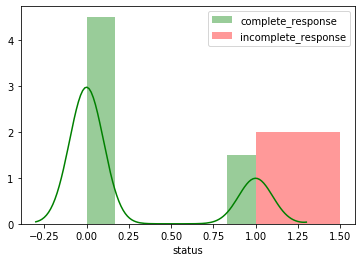

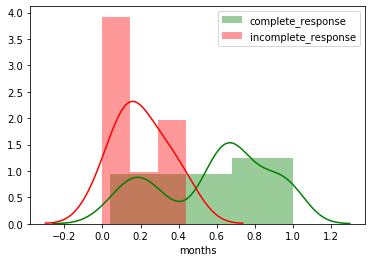

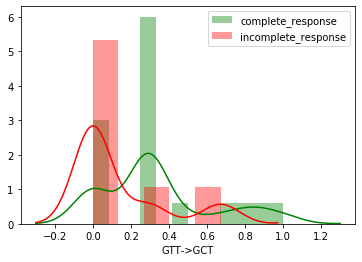

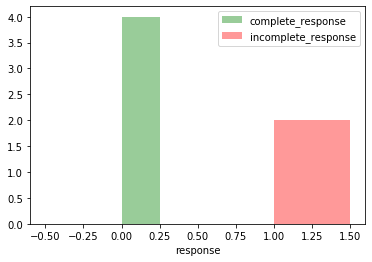

In [136]:
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sb

j = 1

for i in data_train_new.columns:
    
   
    
    sb.distplot(data_train_new[i][data_train_new['response']==0], color='g', label = "complete_response", kde_kws={'bw': 0.1})
    sb.distplot(data_train_new[i][data_train_new['response']==1], color='r', label = "incomplete_response", kde_kws={'bw': 0.1})
    j += 1
    mp.legend(loc='best')

    mp.show()


In [137]:
print(data_train_new)
print(type(data_train_new))

    status    months  GTT->GCT  response
0      0.0  0.631034  0.671188         0
1      1.0  0.660345  0.289065         0
2      0.0  0.876724  0.289065         0
3      1.0  0.143103  0.000000         1
4      1.0  0.681897  0.289065         0
5      0.0  0.668966  0.000000         0
6      0.0  1.000000  0.289065         0
7      1.0  0.437069  0.000000         1
8      1.0  0.146552  0.000000         0
9      0.0  0.552586  0.289065         0
10     1.0  0.132759  0.000000         1
11     1.0  0.262931  0.000000         1
12     0.0  0.038793  0.289065         0
13     0.0  0.168103  0.289065         0
14     1.0  0.132759  0.000000         1
15     0.0  0.547414  0.289065         0
16     0.0  0.793103  0.867194         0
17     0.0  0.972414  0.000000         0
18     0.0  0.306897  0.811508         0
19     0.0  0.964655  0.289065         0
20     1.0  0.000000  0.289065         1
21     1.0  0.169828  0.458157         0
22     0.0  0.698276  0.289065         0
23     0.0  0.65

In [138]:
# # convert data_new to numpy array 

# #import numpy as np
# import pandas as pd
data_train_new=data_train_new.to_numpy()
print(data_train_new)

# data_new=pd.DataFrame(data_new)
# print(type(data_new))




[[0.         0.63103448 0.67118774 0.        ]
 [1.         0.66034483 0.28906483 0.        ]
 [0.         0.87672414 0.28906483 0.        ]
 [1.         0.14310345 0.         1.        ]
 [1.         0.68189655 0.28906483 0.        ]
 [0.         0.66896552 0.         0.        ]
 [0.         1.         0.28906483 0.        ]
 [1.         0.43706897 0.         1.        ]
 [1.         0.14655172 0.         0.        ]
 [0.         0.55258621 0.28906483 0.        ]
 [1.         0.13275862 0.         1.        ]
 [1.         0.26293103 0.         1.        ]
 [0.         0.0387931  0.28906483 0.        ]
 [0.         0.16810345 0.28906483 0.        ]
 [1.         0.13275862 0.         1.        ]
 [0.         0.54741379 0.28906483 0.        ]
 [0.         0.79310345 0.86719448 0.        ]
 [0.         0.97241379 0.         0.        ]
 [0.         0.30689655 0.81150756 0.        ]
 [0.         0.96465517 0.28906483 0.        ]
 [1.         0.         0.28906483 1.        ]
 [1.         

In [139]:
# split into input (X) and output (y) variables(response)
X_train_new = data_train_new[:, :-1]
y_train_new = data_train_new[:,-1]

In [140]:
X_train_new

array([[0.        , 0.63103448, 0.67118774],
       [1.        , 0.66034483, 0.28906483],
       [0.        , 0.87672414, 0.28906483],
       [1.        , 0.14310345, 0.        ],
       [1.        , 0.68189655, 0.28906483],
       [0.        , 0.66896552, 0.        ],
       [0.        , 1.        , 0.28906483],
       [1.        , 0.43706897, 0.        ],
       [1.        , 0.14655172, 0.        ],
       [0.        , 0.55258621, 0.28906483],
       [1.        , 0.13275862, 0.        ],
       [1.        , 0.26293103, 0.        ],
       [0.        , 0.0387931 , 0.28906483],
       [0.        , 0.16810345, 0.28906483],
       [1.        , 0.13275862, 0.        ],
       [0.        , 0.54741379, 0.28906483],
       [0.        , 0.79310345, 0.86719448],
       [0.        , 0.97241379, 0.        ],
       [0.        , 0.30689655, 0.81150756],
       [0.        , 0.96465517, 0.28906483],
       [1.        , 0.        , 0.28906483],
       [1.        , 0.16982759, 0.45815691],
       [0.

In [141]:
y_train_new

array([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0.])

In [142]:
data_test_new=data_test_new.to_numpy()
print(data_test_new)


[[1.         0.21698113 0.56457503 0.        ]
 [0.         0.34034833 1.         0.        ]
 [0.         0.287373   0.56457503 0.        ]
 [1.         0.55805515 0.82708748 1.        ]
 [0.         1.         0.71241437 0.        ]
 [1.         0.15820029 0.         0.        ]
 [0.         0.30914369 0.56457503 1.        ]
 [1.         0.29027576 0.35620719 1.        ]
 [0.         0.09724238 0.35620719 0.        ]
 [0.         0.17489115 0.         0.        ]
 [1.         0.         0.71241437 0.        ]
 [0.         0.70754717 0.71241437 0.        ]
 [1.         0.54644412 0.         0.        ]
 [0.         0.83454282 0.56457503 0.        ]]


In [143]:
X_test_new = data_test_new[:, :-1]
y_test_new = data_test_new[:,-1]

In [144]:
X_test_new

array([[1.        , 0.21698113, 0.56457503],
       [0.        , 0.34034833, 1.        ],
       [0.        , 0.287373  , 0.56457503],
       [1.        , 0.55805515, 0.82708748],
       [0.        , 1.        , 0.71241437],
       [1.        , 0.15820029, 0.        ],
       [0.        , 0.30914369, 0.56457503],
       [1.        , 0.29027576, 0.35620719],
       [0.        , 0.09724238, 0.35620719],
       [0.        , 0.17489115, 0.        ],
       [1.        , 0.        , 0.71241437],
       [0.        , 0.70754717, 0.71241437],
       [1.        , 0.54644412, 0.        ],
       [0.        , 0.83454282, 0.56457503]])

In [145]:
y_test_new

array([0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.])

# perform classification with 5 models (along with GridsearchCV)

64.29
[[0.66096052]
 [0.9217344 ]
 [0.93813621]
 [0.87703471]
 [0.92507313]
 [0.29176413]
 [0.93871804]
 [0.62122324]
 [0.93199985]
 [0.91414111]
 [0.63702584]
 [0.93789915]
 [0.74140198]
 [0.9373607 ]]
48.48
51.52
              precision    recall  f1-score   support

         0.0       0.80      0.73      0.76        11
         1.0       0.25      0.33      0.29         3

    accuracy                           0.64        14
   macro avg       0.53      0.53      0.52        14
weighted avg       0.68      0.64      0.66        14



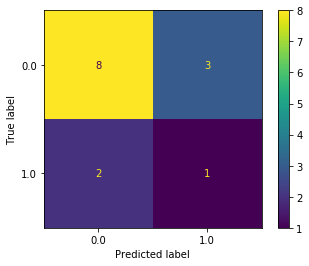

In [146]:
# BASE Support vector classifier

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

sv = SVC(probability=True)
sv.fit(X_train_new, y_train_new)


# Accuracy score
y_pred_sv = sv.predict(X_test_new)
accu_score_sv = round(accuracy_score(y_test_new,y_pred_sv)*100,2)
print(accu_score_sv)

##ROC AUC
# using predict probability 
y_pred_proba_sv = sv.predict_proba(X_test_new)[:, :-1]
print(y_pred_proba_sv)
roc_auc_score_sv1 = round(roc_auc_score(y_test_new,y_pred_proba_sv)*100,2)
print(roc_auc_score_sv1)
# using decison function
y_score_sv = sv.decision_function(X_test_new)
# print(y_score_sv)
roc_auc_score_sv2 = round(roc_auc_score(y_test_new,y_score_sv)*100,2)
print(roc_auc_score_sv2)





from sklearn.metrics import classification_report
print(classification_report(y_test_new,y_pred_sv))

# Confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_new, y_pred_sv, labels=sv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=sv.classes_)
disp.plot()

plt.show()

# as lung_dfs_car has balanced incomplete and complete responses
# so don't need to do over and under sampling for that dataset. Also, n_splits set to 4 in that case(for stratified cross validation).

In [147]:
# over and under sampling gridsearch - SVC 

# grid search 

from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.ensemble import RandomForestClassifier
#from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC




# define pipeline
over = RandomOverSampler(sampling_strategy=0.5,random_state=1)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=1)
steps = [('o', over), ('u', under), ('m', SVC(random_state=1))]
pipeline = Pipeline(steps=steps)
stratified_kfold = RepeatedStratifiedKFold(n_splits=3,random_state=1)
#my_cv = LeaveOneOut()    

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'micro'),
           'recall': make_scorer(recall_score, average = 'micro'),
           'f1': make_scorer(f1_score, average = 'micro'),
           'roc_auc': make_scorer(roc_auc_score)}





param_grid={'m__C': [0.1, 1, 10, 100, 1000], 'm__kernel': ['linear', 'rbf'],'m__gamma':[1, 0.1, 0.01, 0.001,'scale']}
                                                 
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring=scoring,
                           cv=stratified_kfold,
                           refit='roc_auc')

grid_search.fit(X_train_new, y_train_new)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test_new, y_test_new)
print(grid_search.best_params_)
print(f'f1 score: {cv_score}\nTest score: {test_score}')



# can change refit =f1
#can also try Leave one out cross validation my_cv (commented out)



{'m__C': 1, 'm__gamma': 1, 'm__kernel': 'linear'}
f1 score: 0.8658730158730158
Test score: 0.6515151515151515


In [148]:
# print best parameter after tuning 
print(grid_search.best_params_) 
grid_predictions = grid_search.predict(X_test_new) 
   
# print classification report 
print(classification_report(y_test_new, grid_predictions))  

{'m__C': 1, 'm__gamma': 1, 'm__kernel': 'linear'}
              precision    recall  f1-score   support

         0.0       0.88      0.64      0.74        11
         1.0       0.33      0.67      0.44         3

    accuracy                           0.64        14
   macro avg       0.60      0.65      0.59        14
weighted avg       0.76      0.64      0.67        14



In [149]:
roc_auc_scores = roc_auc_score(y_test_new,grid_predictions)
print(roc_auc_scores)

0.6515151515151515


In [150]:
# over and under sampling gridsearch - weighted SVC 

# grid search 

from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.ensemble import RandomForestClassifier
#from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC



# define pipeline
over = RandomOverSampler(sampling_strategy=0.5,random_state=1)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=1)
#steps = [('o', over), ('u', under), ('m', DecisionTreeClassifier())]
steps = [('o', over), ('u', under), ('m', SVC(class_weight='balanced',random_state=1))]
pipeline = Pipeline(steps=steps)
stratified_kfold = RepeatedStratifiedKFold(n_splits=3,random_state=1)
#my_cv = LeaveOneOut()     
    

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'micro'),
           'recall': make_scorer(recall_score, average = 'micro'),
           'f1': make_scorer(f1_score, average = 'micro'),
           'roc_auc': make_scorer(roc_auc_score)}





param_grid={'m__C': [0.1, 1, 10, 100, 1000], 'm__kernel': ['linear', 'rbf'],'m__gamma':[1, 0.1, 0.01, 0.001,'scale']}
                                                 
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring=scoring,
                           cv=stratified_kfold,
                           refit='roc_auc')

grid_search.fit(X_train_new, y_train_new)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test_new, y_test_new)
print(grid_search.best_params_)
print(f'f1 score: {cv_score}\nTest score: {test_score}')




# can change refit =f1
#can also try Leave one out cross validation my_cv (commented out)


{'m__C': 0.1, 'm__gamma': 1, 'm__kernel': 'linear'}
f1 score: 0.8742063492063491
Test score: 0.6515151515151515


In [151]:
# print best parameter after tuning 
print(grid_search.best_params_) 
grid_predictions = grid_search.predict(X_test_new) 
   
# print classification report 
print(classification_report(y_test_new, grid_predictions))

{'m__C': 0.1, 'm__gamma': 1, 'm__kernel': 'linear'}
              precision    recall  f1-score   support

         0.0       0.88      0.64      0.74        11
         1.0       0.33      0.67      0.44         3

    accuracy                           0.64        14
   macro avg       0.60      0.65      0.59        14
weighted avg       0.76      0.64      0.67        14



In [152]:
roc_auc_scores = roc_auc_score(y_test_new,grid_predictions)
print(roc_auc_scores)

0.6515151515151515


In [153]:
# sklearn RF +random over and undersampling 

from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from statistics import *
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



##


stratified_kfold = RepeatedStratifiedKFold(n_splits=3,random_state=1)
#my_cv = LeaveOneOut()     

param_grid = {
    'max_depth': [80,100],'max_features': [2, 3],
    'min_samples_split': [2,8,10],'n_estimators': [100, 200]
}


scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'micro'),
           'recall': make_scorer(recall_score, average = 'micro'),
           'f1': make_scorer(f1_score, average = 'micro'),
           'roc_auc': make_scorer(roc_auc_score)}



grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=1),
                           param_grid=param_grid,
                           scoring=scoring,
                           cv=stratified_kfold,refit='roc_auc'
                           )

grid_search.fit(X_train_new, y_train_new)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test_new, y_test_new)
print(grid_search.best_params_)
print(f'f1 score: {cv_score}\nTest score: {test_score}')




# can change refit =f1
#can also try Leave one out cross validation my_cv (commented out)


{'max_depth': 80, 'max_features': 2, 'min_samples_split': 8, 'n_estimators': 100}
f1 score: 0.7503968253968253
Test score: 0.40909090909090906


In [154]:
# print best parameter after tuning 
print(grid_search.best_params_) 
grid_predictions = grid_search.predict(X_test_new) 
   
# print classification report 
print(classification_report(y_test_new, grid_predictions))  

{'max_depth': 80, 'max_features': 2, 'min_samples_split': 8, 'n_estimators': 100}
              precision    recall  f1-score   support

         0.0       0.75      0.82      0.78        11
         1.0       0.00      0.00      0.00         3

    accuracy                           0.64        14
   macro avg       0.38      0.41      0.39        14
weighted avg       0.59      0.64      0.61        14



In [155]:
roc_auc_scores = roc_auc_score(y_test_new,grid_predictions)
print(roc_auc_scores)

0.40909090909090906


In [156]:
#evaluating a knn model with random oversampling and undersampling



from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.ensemble import RandomForestClassifier
#from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score





#my_cv = LeaveOneOut()     


stratified_kfold = RepeatedStratifiedKFold(n_splits=3,random_state=1)
    
#param_grid = {'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'micro'),
           'recall': make_scorer(recall_score, average = 'micro'),
           'f1': make_scorer(f1_score, average = 'micro'),
           'roc_auc': make_scorer(roc_auc_score)}


param_grid = {
    'n_neighbors': [5,9,19],'weights': ['uniform','distance'],
    'metric': ['minkowski','manhattan','euclidean']
}

grid_search = GridSearchCV(estimator=KNeighborsClassifier(),
                           param_grid=param_grid,
                           scoring=scoring,
                           cv=stratified_kfold,
                           refit='roc_auc')

grid_search.fit(X_train_new, y_train_new)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test_new, y_test_new)
print(grid_search.best_params_)
print(f'f1 score: {cv_score}\nTest score: {test_score}')




# can change refit =f1
#can also try Leave one out cross validation my_cv (commented out)




{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
f1 score: 0.8523809523809525
Test score: 0.5757575757575757


In [157]:
# print best parameter after tuning 
print(grid_search.best_params_) 
grid_predictions = grid_search.predict(X_test_new) 
   
# print classification report 
print(classification_report(y_test_new, grid_predictions))  

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82        11
         1.0       0.33      0.33      0.33         3

    accuracy                           0.71        14
   macro avg       0.58      0.58      0.58        14
weighted avg       0.71      0.71      0.71        14



In [158]:
roc_auc_scores = roc_auc_score(y_test_new,grid_predictions)
print(roc_auc_scores)

0.5757575757575757


In [159]:
# over and under sampling in MLP classifier 

from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.ensemble import RandomForestClassifier
#from imblearn.ensemble import BalancedRandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
#from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# defining MLP MODEL 



stratified_kfold = RepeatedStratifiedKFold(n_splits=3,random_state=1)
#my_cv = LeaveOneOut()     


scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'micro'),
           'recall': make_scorer(recall_score, average = 'micro'),
           'f1': make_scorer(f1_score, average = 'micro'),
           'roc_auc': make_scorer(roc_auc_score)}

    

param_grid = {
    'hidden_layer_sizes': [100,200,300],'alpha': [0.0001,0.001],
    'learning_rate': ['constant', 'adaptive'],'max_iter':[250,350]
}

grid_search = GridSearchCV(estimator=MLPClassifier(validation_fraction=0.1, random_state=1),
                           param_grid=param_grid,
                           scoring=scoring,
                           cv=stratified_kfold,refit='roc_auc'
                           )

grid_search.fit(X_train_new, y_train_new)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test_new, y_test_new)
print(grid_search.best_params_)
print(f'f1 score: {cv_score}\nTest score: {test_score}')



# can change refit =f1
#can also try Leave one out cross validation my_cv (commented out)





{'alpha': 0.0001, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'max_iter': 250}
f1 score: 0.7837301587301587
Test score: 0.40909090909090906


In [160]:
# print best parameter after tuning 
print(grid_search.best_params_) 
grid_predictions = grid_search.predict(X_test_new) 
   
# print classification report 
print(classification_report(y_test_new, grid_predictions))  

{'alpha': 0.0001, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'max_iter': 250}
              precision    recall  f1-score   support

         0.0       0.75      0.82      0.78        11
         1.0       0.00      0.00      0.00         3

    accuracy                           0.64        14
   macro avg       0.38      0.41      0.39        14
weighted avg       0.59      0.64      0.61        14



In [161]:
roc_auc_scores = roc_auc_score(y_test_new,grid_predictions)
print(roc_auc_scores)

0.40909090909090906
